In [1]:
import os
import keras
import keras.backend as K
import numpy as np
import tensorflow as tf

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from metrics import f1, f1_loss
from keras.utils import plot_model

tf.keras.utils.get_custom_objects()
tf.keras.utils.get_custom_objects()['f1'] = f1
tf.keras.utils.get_custom_objects()['f1_loss'] = f1_loss


In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

    
BASE_FOLDER = "../results/"
def plot_results(training_folder, metric = None):
    if not metric:
        metric = "accuracy"
    path = os.path.join(BASE_FOLDER, training_folder, "training_history.csv")
    df = pd.read_csv(path, sep=";")

    print("Results file: {}".format(training_folder))
    print("Last 10 records avg: ")
    print(df.tail(10).mean())

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    plt.title(training_folder)
    axs[0].plot(df["loss"], label='loss')
    axs[0].plot(df["val_loss"], label='val_loss')
    axs[0].legend(loc="upper right")
    axs[1].plot(df[metric], label=metric)
    axs[1].plot(df["val_"+metric], label='val_'+metric)
    axs[1].legend(loc="lower right")
    
def load_model(training_folder):
    return keras.models.load_model("{}/{}/model".format(BASE_FOLDER, training_folder))

Results file: conv1d/20200724_070726_conv_rest_stacked
Last 10 records avg: 
epoch       60.500000
f1           0.768068
loss         0.231532
val_f1       0.730836
val_loss     0.268982
dtype: float64


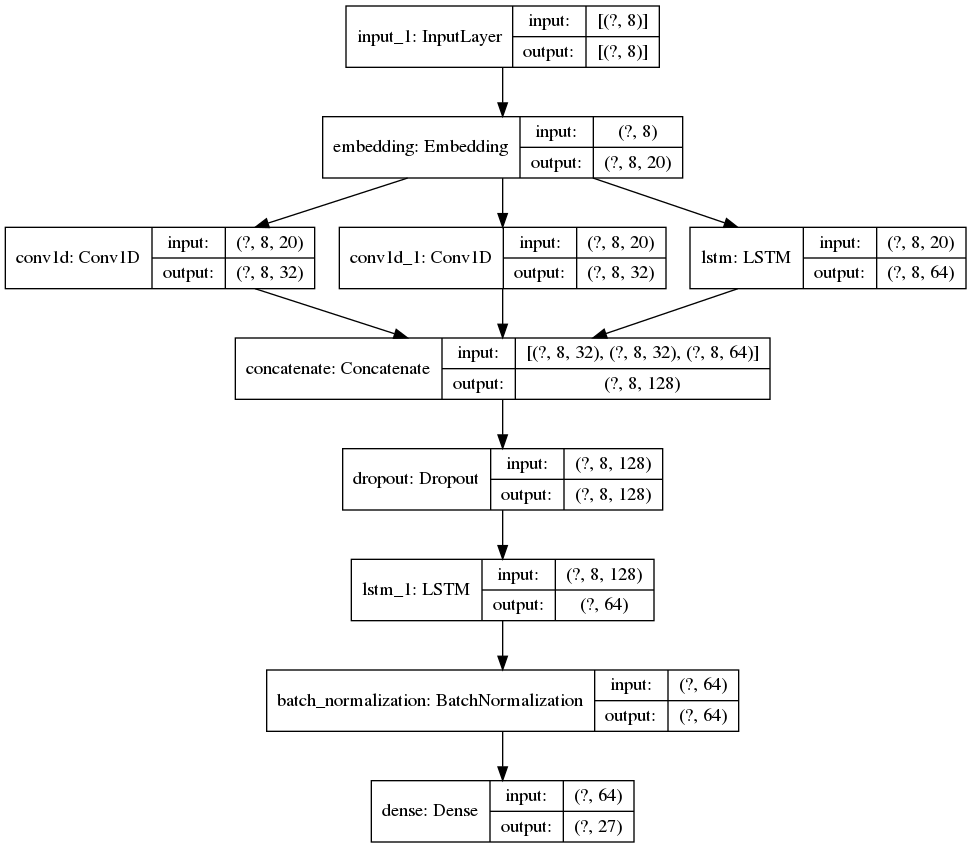

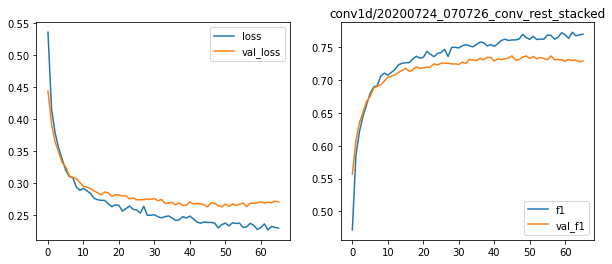

In [3]:
folder = "1l_width/20200723_161533_256_depth5_batch_noreg_BASE"
folder = "conv1d/20200724_070726_conv_rest_stacked"
plot_results(folder, "f1")
model = load_model(folder)
plot_model(model, show_shapes=True)
# print(model.summary())

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
from data import read_crop_list, load_structured_sample
import models_1d
from data import read_crop_list, load_structured_sample
from eval import eval_model_one_hot
from metrics import f1, f1_loss
from models import model_basic_lstm
from training import train, create_training_folder, create_callbacks
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

df_crops, vocab = read_crop_list()
sample = load_structured_sample()

y = sample[:, 8]
X = sample[:, 0:8]
y = to_categorical(y)

crop_list = np.unique(sample)
crop_names = df_crops["description"].values.tolist()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

y_hat = model.predict(X_test)
# eval_model_one_hot(folder, y_test, y_hat, crop_list, crop_names)
class_test = np.argmax(y_test, axis=1)
class_predicted = np.argmax(y_hat, axis=1)

print(classification_report(class_test, class_predicted))
# cfm = confusion_matrix(class_test, class_predicted, crop_list)
# print(cfm)


              precision    recall  f1-score   support

           0       0.29      0.46      0.36       628
           1       0.95      0.96      0.96       200
           2       0.61      0.67      0.64       200
           3       0.40      0.33      0.36       467
           4       0.39      0.42      0.40       200
           5       0.57      0.36      0.44       200
           6       0.61      0.35      0.45       479
           7       0.24      0.27      0.26       200
           8       0.37      0.23      0.28       200
           9       0.33      0.27      0.30       200
          10       0.27      0.23      0.24       200
          11       0.67      0.61      0.64       200
          12       0.21      0.20      0.21       200
          13       0.19      0.46      0.27       126
          14       0.54      0.49      0.52       200
          15       0.92      0.94      0.93       200
          16       0.99      0.98      0.98       200
          17       0.92    